In [1]:
import pandas as pd
import math 
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../src')
import utils_explore as ue

data = ue.all_bets()

In [2]:
MIN_GPY = 15 # min game per year thershold
AVG_GPM = 10 # average game per month threshold

In [3]:
# summary on all authors for all time
# + picking the most interesting ones
# -> then exploring them

# alltime summary
ue.summary_chart(data,[30,250,1000,5000],0.0)

,author,count,return,win,success_rate,category
37,teplofevralya,1492.0,1518.38,26.38,1.768097,"(1000.0, 5000.0]"
0,achakvetadze,1507.0,1517.14,10.14,0.672860,"(1000.0, 5000.0]"
6,chaplygin,283.0,346.13,63.13,22.307420,"(250.0, 1000.0]"
42,zhukov,666.0,738.72,72.72,10.918919,"(250.0, 1000.0]"
13,falcao1984,440.0,471.33,31.33,7.120455,"(250.0, 1000.0]"
18,karpovvyacheslav,50.0,58.00,8.00,16.000000,"(30.0, 250.0]"
26,netsenko,129.0,145.56,16.56,12.837209,"(30.0, 250.0]"
25,naguchevroman,44.0,45.63,1.63,3.704545,"(30.0, 250.0]"
29,nvaluev,189.0,190.09,1.09,0.576720,"(30.0, 250.0]"
22,kruglov,30.0,34.48,4.48,14.933333,NaN


In [4]:
# only last (2019) year
df_sum_19 = ue.summary_chart(data[data['placed-date'] >= datetime.date(2019, 1, 1)],
                             min_rate_thres=3.0)
#drop authors that play way too occasionally
df_sum_19 = df_sum_19[df_sum_19['count']>=MIN_GPY]
### emmagadzhieva goes out
df_sum_19

,author,count,return,win,success_rate
29,nvaluev,19.0,26.59,7.59,39.947368
31,ostapbender,23.0,30.72,7.72,33.565217
6,chaplygin,177.0,211.83,34.83,19.677966
18,karpovvyacheslav,50.0,58.00,8.00,16.000000
22,kruglov,30.0,34.48,4.48,14.933333
26,netsenko,129.0,145.56,16.56,12.837209
41,zhukov,166.0,175.70,9.70,5.843373
37,teplofevralya,501.0,526.98,25.98,5.185629
13,falcao1984,280.0,293.88,13.88,4.957143
25,naguchevroman,44.0,45.63,1.63,3.704545


In [5]:
#get extended stats on all candidates
candidates = list(df_sum_19.author)
cand_data = data[data.author.isin(candidates)]
ue.summary_chart(cand_data)
### some authors (nvaluev, ostapbender) have
### really poor results in all time table

,author,count,return,win,success_rate
0,chaplygin,283.0,346.13,63.13,22.307420
2,karpovvyacheslav,50.0,58.00,8.00,16.000000
3,kruglov,30.0,34.48,4.48,14.933333
5,netsenko,129.0,145.56,16.56,12.837209
9,zhukov,666.0,738.72,72.72,10.918919
1,falcao1984,440.0,471.33,31.33,7.120455
4,naguchevroman,44.0,45.63,1.63,3.704545
8,teplofevralya,1492.0,1518.38,26.38,1.768097
6,nvaluev,189.0,190.09,1.09,0.576720
7,ostapbender,652.0,629.63,-22.37,-3.430982


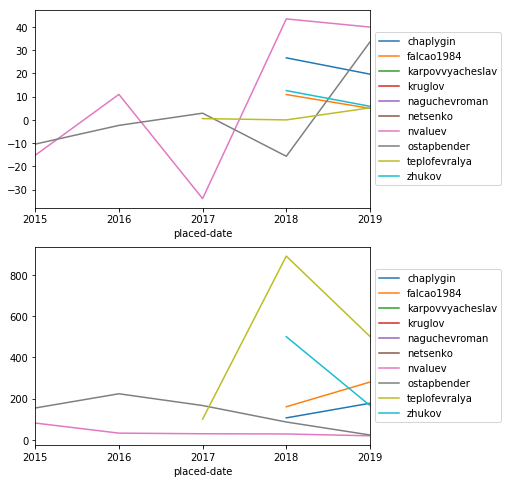

In [6]:
#check yearly progress
df_yearly = ue.calc_win_rate(cand_data, 'Y', MIN_GPY)
df_r = df_yearly.pivot(index='placed-date', columns='author', values='success_rate')
df_c = df_yearly.pivot(index='placed-date', columns='author', values='count')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey='row', figsize=(6,8))
df_r.plot(ax=ax1)
df_c.plot(ax=ax2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
### only valuev, ostapbender and teplofevralya have long history
### valuev in only last two years shows profit meanwhile number of bets decreased
### ostapbender shows profit only in 2019 after dramatically descreasing a number of bets
### teplofevralya shows profit after decreasing the number of bets by a half

In [7]:
#check recent monthly progress (last 2 years: 2018, 2019)
#find min thres
df = ue.calc_win_rate(cand_data[cand_data['placed-date']>=datetime.date(2018, 1, 1)], 'M')
df = df.groupby(by='author').agg({'count':'mean'})
df.reset_index(inplace=True)
group1 = df[df['count'] >= AVG_GPM]['author'].tolist()
group2 = df[df['count'] < AVG_GPM]['author'].tolist()
df.sort_values(by='count', ascending=False)
### group1 - mid/high velocity and 'comparable' standard deviation
### group2 - sets simetime may consist of only one observation

,author,count
8,teplofevralya,60.521739
9,zhukov,33.300000
3,kruglov,30.000000
5,netsenko,25.800000
1,falcao1984,23.157895
4,naguchevroman,14.666667
0,chaplygin,12.304348
2,karpovvyacheslav,8.333333
7,ostapbender,5.736842
6,nvaluev,2.473684


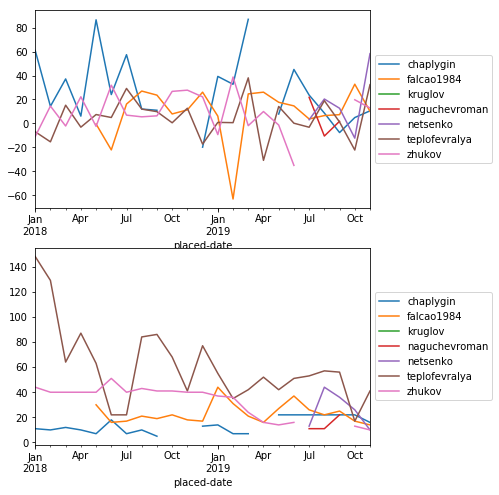

In [8]:
#explore two groups separately
df_1 = ue.calc_win_rate(
    cand_data[
        (cand_data['placed-date']>=datetime.date(2018, 1, 1)) 
        & (cand_data.author.isin(group1))], 
    'M', 5)
df_r = df_1.pivot(index='placed-date', columns='author', values='success_rate')
df_c = df_1.pivot(index='placed-date', columns='author', values='count')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey='row', figsize=(6,8))
df_r.plot(ax=ax1)
df_c.plot(ax=ax2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
### trendlines could help in a future, but quarter stats may be used for now
### chaplygin increasing his numbers, but profit goes down
### netsenko just started
### zhukov wasn't active for a some time. Reduced his betting and then lost heavily
### falcao1984 is consistent. Had only one period, where he lost big, 
###     and he made more bets, than ususal that time
### teplofevralya - number of bets decreases
### kruglov just started
### naguchevroman just started


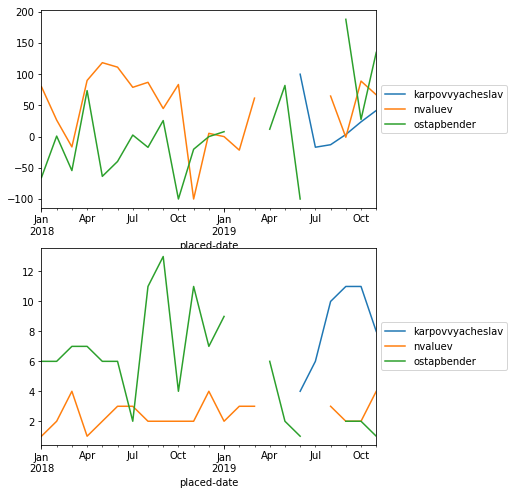

In [9]:
df_2 = ue.calc_win_rate(
    cand_data[
        (cand_data['placed-date']>=datetime.date(2018, 1, 1)) 
        & (cand_data.author.isin(group2))], 
    'M')
df_r = df_2.pivot(index='placed-date', columns='author', values='success_rate')
df_c = df_2.pivot(index='placed-date', columns='author', values='count')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey='row', figsize=(6,8))
df_r.plot(ax=ax1)
df_c.plot(ax=ax2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
### ostapbender not stable moving forward, decreasing a number of bets
### nvaluev keeps his level of profit and low number of bets
### karpovvyacheslav just started, not much data

In [10]:
### they worth a try, but mot much to actually explore
df_sum_19[df_sum_19.author.isin(['nvaluev', 'ostapbender', 'karpovvyacheslav'])]

,author,count,return,win,success_rate
29,nvaluev,19.0,26.59,7.59,39.947368
31,ostapbender,23.0,30.72,7.72,33.565217
18,karpovvyacheslav,50.0,58.00,8.00,16.000000


In [11]:
### zhukov, netsenko have another shot together
df_sum_19[df_sum_19.author.isin(['zhukov','naguchevroman', 'netsenko', 'kruglov'])]

,author,count,return,win,success_rate
22,kruglov,30.0,34.48,4.48,14.933333
26,netsenko,129.0,145.56,16.56,12.837209
41,zhukov,166.0,175.70,9.70,5.843373
25,naguchevroman,44.0,45.63,1.63,3.704545


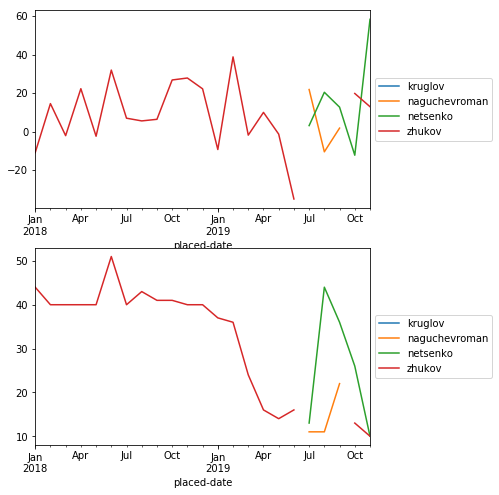

In [12]:
# let's have a closer look to group3
group3 = ['zhukov', 'naguchevroman', 'netsenko', 'kruglov']
df_3 = ue.calc_win_rate(
    cand_data[
        (cand_data['placed-date']>=datetime.date(2018, 1, 1)) 
        & (cand_data.author.isin(group3))], 
    'M')
df_r = df_3.pivot(index='placed-date', columns='author', values='success_rate')
df_c = df_3.pivot(index='placed-date', columns='author', values='count')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey='row', figsize=(6,8))
df_r.plot(ax=ax1)
df_c.plot(ax=ax2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
### 
### netsenko and zhukov are unstable, but interesting...

In [13]:
### worth deeper exploration: chaplygin, falcao1984, teplofevralya
# yearly stats
df_sum_19[df_sum_19.author.isin(['chaplygin', 'falcao1984', 'teplofevralya'])]

,author,count,return,win,success_rate
6,chaplygin,177.0,211.83,34.83,19.677966
37,teplofevralya,501.0,526.98,25.98,5.185629
13,falcao1984,280.0,293.88,13.88,4.957143


In [14]:
# half a year
ue.summary_chart(
    cand_data[
        (cand_data['placed-date']>=datetime.date(2019, 5, 1)) 
        & (cand_data.author.isin(['chaplygin', 'falcao1984', 'teplofevralya']))])

,author,count,return,win,success_rate
0,chaplygin,148,167.84,19.84,13.405405
1,falcao1984,168,189.42,21.42,12.750000
2,teplofevralya,317,342.34,25.34,7.993691
